#imports and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
"""
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

label_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
             'Shirt','Sneaker','Bag','Ankle boot']

In [4]:
X_train = np.zeros([60000,784]) 
for i in range(60000): 
    img=train_images[i,:,:]
    X_train[i,:] = img.reshape([784])

X_test = np.zeros([10000,784]) 
for i in range(10000):
    img=test_images[i,:,:]
    X_test[i,:] = img.reshape([784])

X_sub = X_train[:600,:]
y_sub = train_labels[:600]

#3

In [ ]:
#Inverse

inv_acc=[]
for k in range(1,13):
    model = KNeighborsClassifier(n_neighbors=k,weights='distance')
    model.fit(X_train, train_labels)
    y_preds = model.predict(X_test)
    score=accuracy_score(y_true=test_labels, y_pred=y_preds)
    inv_acc.append(score)
    print('K:',k,'\n Accuracy:', score)

In [ ]:
#inverse squared
def dist_inv_sq(v):
    return 1/(v**2)

inv_sq_acc=[]
for k in range(1,13):
    model = KNeighborsClassifier(n_neighbors=k,weights=dist_inv_sq)
    model.fit(X_train, train_labels)
    y_preds = model.predict(X_test)
    score=accuracy_score(y_true=test_labels, y_pred=y_preds)
    inv_sq_acc.append(score)
    print('K:',k,'\n Accuracy:', score)


In [5]:
#linear weights
def f2(v):
    dk=np.min(v) #dist to k+1 point
    d1=np.max(v)
    w=(dk-v)/(dk-d1)
    return w

lin_acc=[]

for k in range(2,14):
    model = KNeighborsClassifier(n_neighbors=k, weights=f2)
    model.fit(X_train, train_labels)
    y_preds = model.predict(X_test)
    score=accuracy_score(y_true=test_labels, y_pred=y_preds)
    lin_acc.append(score)
    print('K:',k-1,'\n Accuracy:', score)


K: 1 
 Accuracy: 0.8206
K: 2 
 Accuracy: 0.8538
K: 3 
 Accuracy: 0.8463
K: 4 
 Accuracy: 0.8498
K: 5 
 Accuracy: 0.8464
K: 6 
 Accuracy: 0.8519
K: 7 
 Accuracy: 0.8453
K: 8 
 Accuracy: 0.8477
K: 9 
 Accuracy: 0.8443
K: 10 
 Accuracy: 0.8463
K: 11 
 Accuracy: 0.8432
K: 12 
 Accuracy: 0.8449


Text(0, 0.5, 'Percent Error')

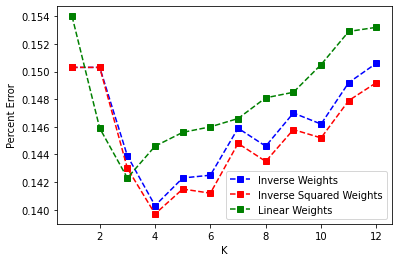

In [ ]:
inv_acc=[0.8497,0.8497,0.8561,0.8597,0.8577,0.8575,
         0.8541,0.8554,0.853,0.8538,0.8508,0.8494]
inv_sq_acc = [0.8497,0.8497,0.857,0.8603,0.8585,0.8588,
              0.8552,0.8565,0.8542,0.8548,0.8521,0.8508]
lin_acc=[0.846,0.8541,0.8577,0.8554,0.8544,0.854,
         0.8534,0.8519,0.8515,0.8495,0.8471,0.8468,]

inv_error = 1-np.array(inv_acc)
inv_sq_error = 1-np.array(inv_sq_acc)
lin_error = 1-np.array(lin_acc)

plt.plot(range(1,13), inv_error, '--bs', label='Inverse Weights')
plt.plot(range(1,13), inv_sq_error,'--rs', label = 'Inverse Squared Weights')
plt.plot(range(1,13), lin_error,'--gs', label = 'Linear Weights')

plt.legend()
plt.xlabel('K')
plt.ylabel('Percent Error')